In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("./vehicle_prices.csv")
df.head(2)

,year,make,model,price
0,2023,Honda,Elevate,14530.0
1,2023,Honda,e,37140.0


In [6]:
df.shape

(1170, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1170 non-null   int64  
 1   make    1170 non-null   object 
 2   model   1170 non-null   object 
 3   price   1170 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 36.7+ KB


In [8]:
df.describe()

,year,price
count,1170.0,1.170000e+03
mean,2023.0,1.545724e+05
std,0.0,4.351799e+05
min,2023.0,7.300000e+03
25%,2023.0,3.890000e+04
50%,2023.0,5.377000e+04
75%,2023.0,9.517500e+04
max,2023.0,5.000000e+06


In [9]:
df.isna().sum()

year     0
make     0
model    0
price    0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.duplicated().sum()

3

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(1167, 4)

In [14]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array([], dtype=object)

In [15]:
le = LabelEncoder()

In [16]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

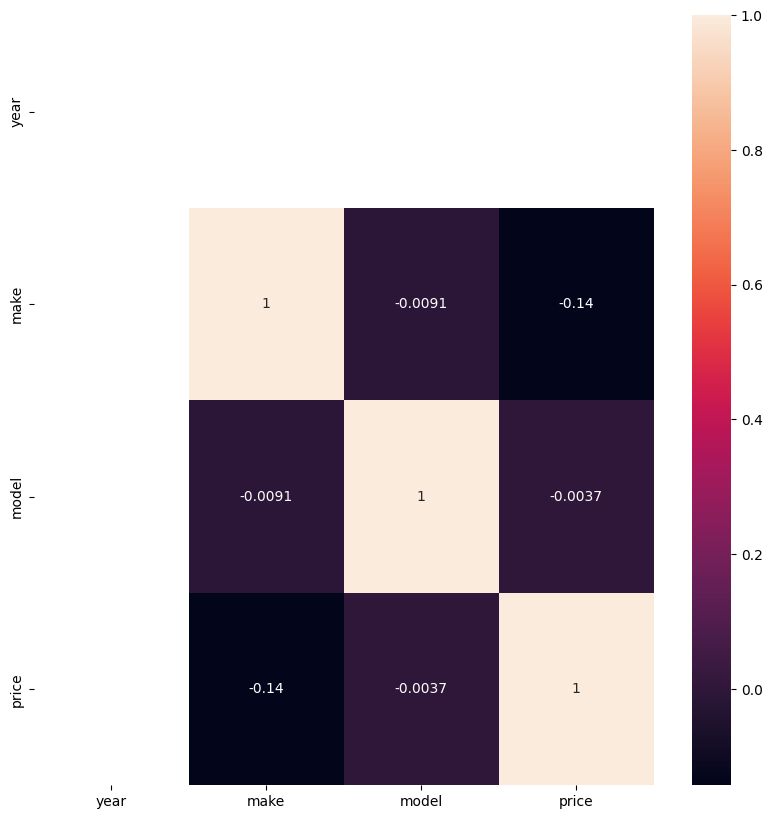

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
df.head(2)

,year,make,model,price
0,2023,17,403,14530.0
1,2023,17,1139,37140.0


In [19]:
# Divide the data into “Attributes” and “labels”
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [20]:
y.value_counts()

49000.0     7
46320.0     5
56000.0     4
49050.0     4
43990.0     4
           ..
136000.0    1
169700.0    1
57500.0     1
228900.0    1
119990.0    1
Name: price, Length: 929, dtype: int64

In [21]:
le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
X_test

,make,model
905,30,499
1066,13,30
597,28,694
329,14,174
426,19,866
...,...,...
832,15,1008
45,4,1110
1135,7,407
1021,27,297


In [26]:
# Create a Linear Regression model and fit it
lr =LinearRegression()
model = lr.fit(X_train,y_train)

In [27]:
# Predicting the data
y_predict=model.predict(X_test)
y_predict

array([428.65640677, 488.96389213, 427.51555921, 481.58410074,
       445.60690789, 485.99202638, 429.63380606, 403.13078394,
       423.02821432, 443.02662656, 464.45426749, 423.92158457,
       453.86533813, 487.19756179, 449.26557038, 464.3884272 ,
       418.54992206, 405.30919231, 450.93314027, 470.73633654,
       453.28865935, 420.08465893, 451.70849236, 405.01858977,
       445.56715654, 404.24554257, 449.33141067, 494.14033865,
       508.08712286, 396.36627023, 429.65084235, 489.06495745,
       429.55208191, 455.971075  , 502.89141862, 459.31189356,
       512.94794688, 488.82768522, 456.23443617, 443.38874816,
       456.10275558, 422.92945388, 440.87545956, 470.97360877,
       421.31974062, 486.09078682, 486.17818972, 444.98142513,
       418.54876962, 465.1126704 , 462.54605149, 443.125387  ,
       443.55334889, 491.99369797, 490.74725876, 461.38248886,
       424.05326515, 487.42800281, 465.14559054, 409.74320689,
       445.11310571, 439.92760655, 456.20151602, 449.61

In [28]:
from sklearn.metrics import accuracy_score
r2_score(y_predict,y_test)

-64.65546368585566

In [29]:
DT=DecisionTreeRegressor()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=r2_score(y_test,dt_pred)*100
(dt_acc_score)

81.39311822630617

In [30]:
RF=RandomForestRegressor()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=r2_score(y_test,rf_pred)*100
(rf_acc_score)

84.96050248945757